In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import spectrogram

With PI loop on feeding back on the EOM

In [6]:
loop_file_1 = r"D:\Experiment\Precilaser\20230719_pi_loop\loop_on_1_3mbar\loop_on_1_3mbar_1.csv"
loop_file_2 = r"D:\Experiment\Precilaser\20230719_pi_loop\loop_on_1_3mbar\loop_on_1_3mbar_2.csv"
loop_file_3 = r"D:\Experiment\Precilaser\20230719_pi_loop\loop_on_1_3mbar\loop_on_1_3mbar_3.csv"

loop_on_1 = np.genfromtxt(loop_file_1, delimiter=',', skip_header=3).T
loop_on_2 = np.genfromtxt(loop_file_2, delimiter=',', skip_header=3).T
loop_on_3 = np.genfromtxt(loop_file_3, delimiter=',', skip_header=3).T

Text(0.5, 0, 'Time (s)')

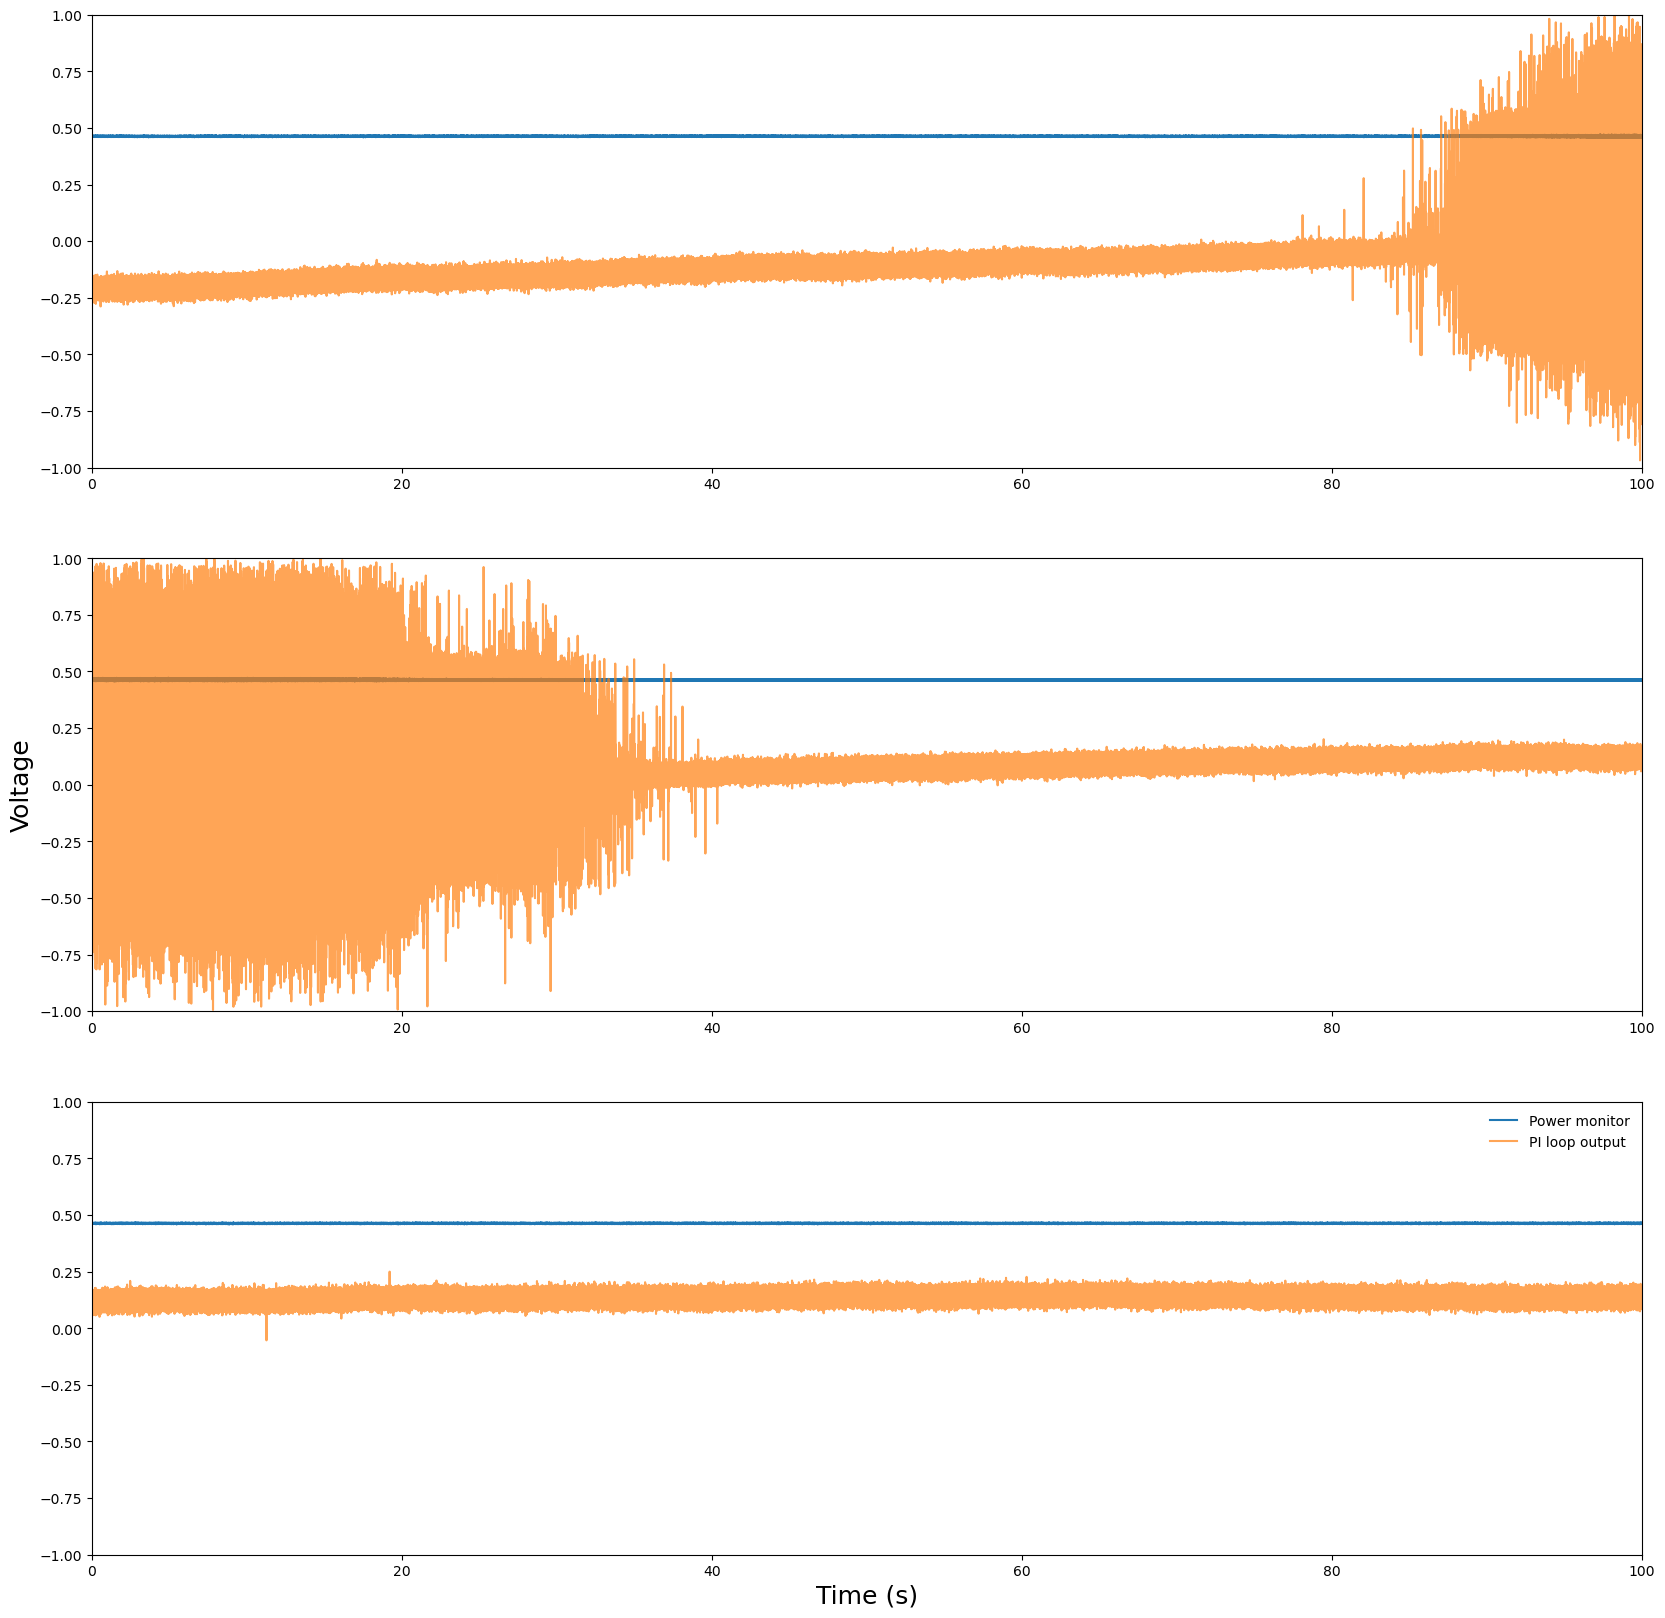

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

ax[0].plot(loop_on_1[0], loop_on_1[2])
ax[0].plot(loop_on_1[0], loop_on_1[3], alpha=0.7)

ax[1].plot(loop_on_2[0], loop_on_2[2])
ax[1].plot(loop_on_2[0], loop_on_2[3], alpha=0.7)

ax[2].plot(loop_on_3[0], loop_on_3[2], label='Power monitor')
ax[2].plot(loop_on_3[0], loop_on_3[3], alpha=0.7, label='PI loop output')
ax[2].legend(frameon=False, fontsize=18)

for a in ax:
    a.set_xlim(0, 100)
    a.set_ylim(-1, 1)
    
ax[1].set_ylabel('Voltage', fontsize=18)
ax[2].set_xlabel('Time (s)', fontsize=18)

Compute the spectrogram to study the z frequency stability

In [33]:
fs = int(np.ceil(1 / (loop_on_1[0, 1] - loop_on_1[0, 0])))
ff, tt, sxx_loop_1 = spectrogram(loop_on_1[1], fs, nperseg=1000)
ff, tt, sxx_loop_2 = spectrogram(loop_on_2[1], fs, nperseg=1000)
ff, tt, sxx_loop_3 = spectrogram(loop_on_3[1], fs, nperseg=1000)

Text(0.5, 0, 'Time (s)')

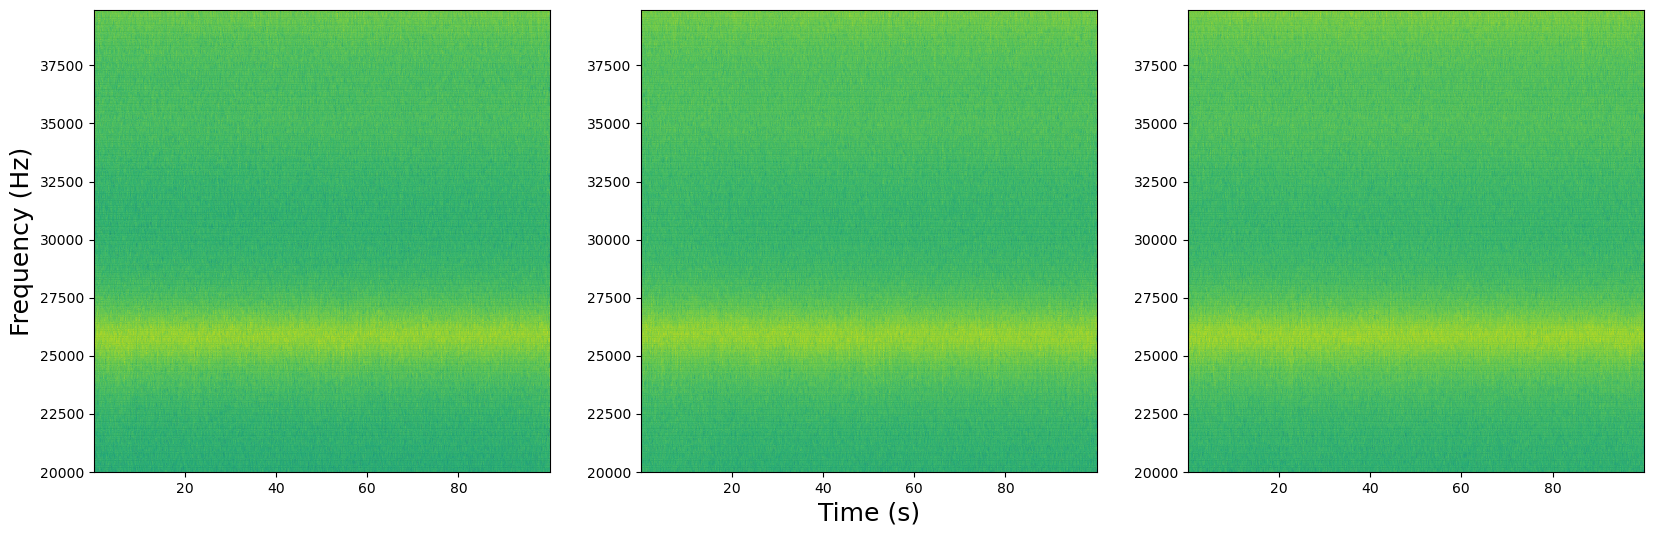

In [37]:
flb, fub = 200, 400
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].pcolormesh(tt, ff[flb:fub], np.log(sxx_loop_1[flb:fub]), shading='gouraud')
ax[1].pcolormesh(tt, ff[flb:fub], np.log(sxx_loop_2[flb:fub]), shading='gouraud')
ax[2].pcolormesh(tt, ff[flb:fub], np.log(sxx_loop_3[flb:fub]), shading='gouraud')

ax[0].set_ylabel('Frequency (Hz)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)

Now data with no feedback on the input power

In [38]:
loop_off_file_1 = r"D:\Experiment\Precilaser\20230719_pi_loop\loop_off_1_3mbar\loop_off_1_3mbar_1.csv"
loop_off_file_2 = r"D:\Experiment\Precilaser\20230719_pi_loop\loop_off_1_3mbar\loop_off_1_3mbar_2.csv"
loop_off_file_3 = r"D:\Experiment\Precilaser\20230719_pi_loop\loop_off_1_3mbar\loop_off_1_3mbar_3.csv"

loop_off_1 = np.genfromtxt(loop_off_file_1, delimiter=',', skip_header=3).T
loop_off_2 = np.genfromtxt(loop_off_file_2, delimiter=',', skip_header=3).T
loop_off_3 = np.genfromtxt(loop_off_file_3, delimiter=',', skip_header=3).T

Text(0.5, 0, 'Time (s)')

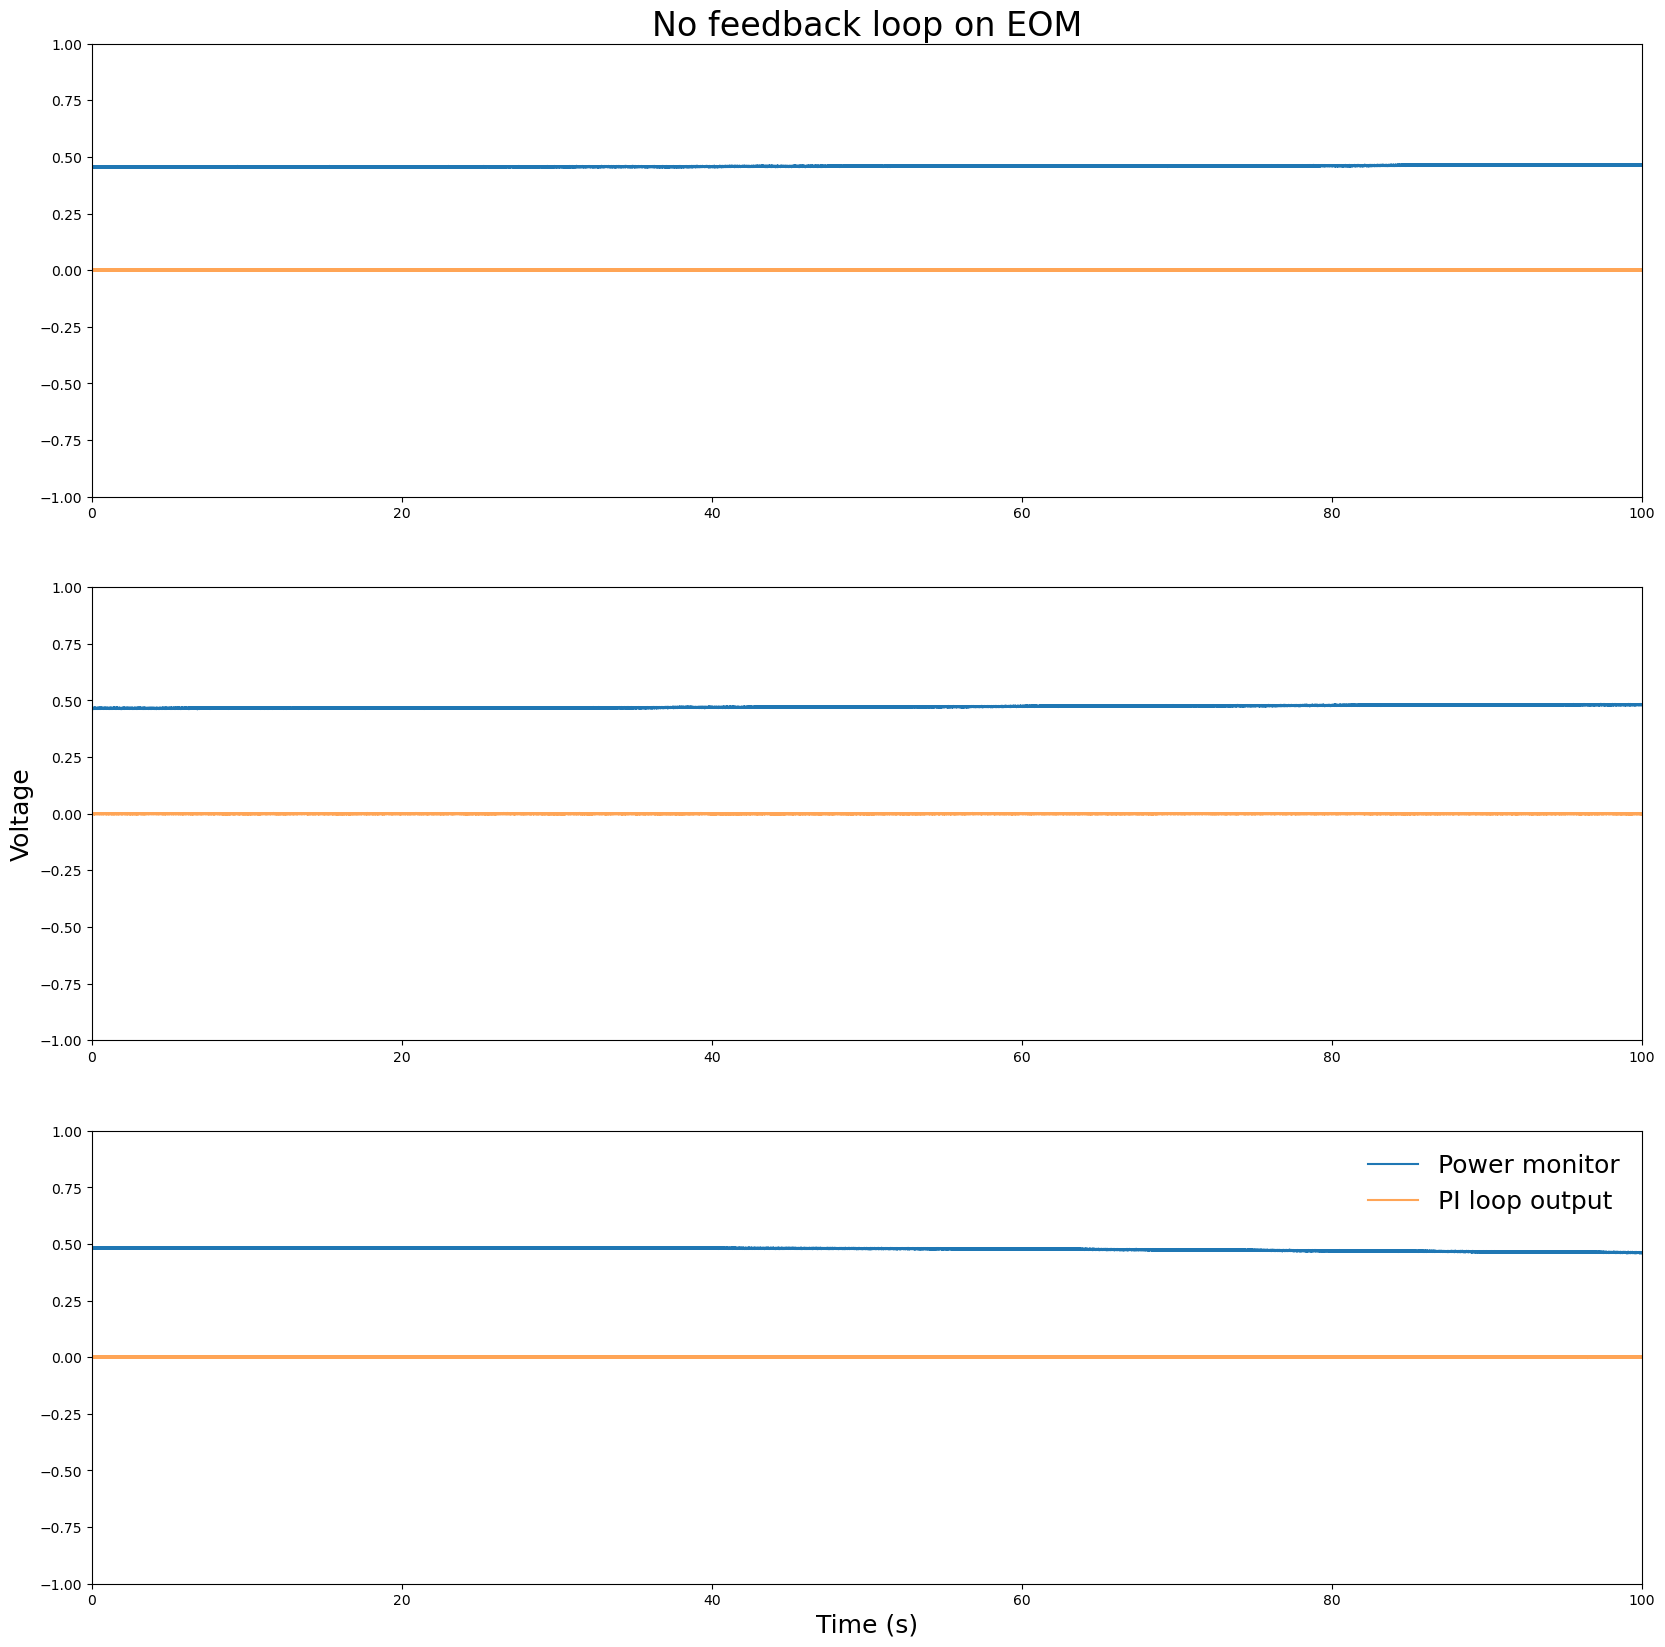

In [40]:
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

ax[0].plot(loop_off_1[0], loop_off_1[2])
ax[0].plot(loop_off_1[0], loop_off_1[3], alpha=0.7)

ax[1].plot(loop_off_2[0], loop_off_2[2])
ax[1].plot(loop_off_2[0], loop_off_2[3], alpha=0.7)

ax[2].plot(loop_off_3[0], loop_off_3[2], label='Power monitor')
ax[2].plot(loop_off_3[0], loop_off_3[3], alpha=0.7, label='PI loop output')
ax[2].legend(frameon=False, fontsize=18)

for a in ax:
    a.set_xlim(0, 100)
    a.set_ylim(-1, 1)

ax[0].set_title('No feedback loop on EOM', fontsize=24)
ax[1].set_ylabel('Voltage', fontsize=18)
ax[2].set_xlabel('Time (s)', fontsize=18)

Looks like the PI loop does help stablize the z frequency.

In [41]:
fs = int(np.ceil(1 / (loop_off_1[0, 1] - loop_off_1[0, 0])))
ff, tt, sxx_loop_off_1 = spectrogram(loop_off_1[1], fs, nperseg=1000)
ff, tt, sxx_loop_off_2 = spectrogram(loop_off_2[1], fs, nperseg=1000)
ff, tt, sxx_loop_off_3 = spectrogram(loop_off_3[1], fs, nperseg=1000)

Text(0.5, 0, 'Time (s)')

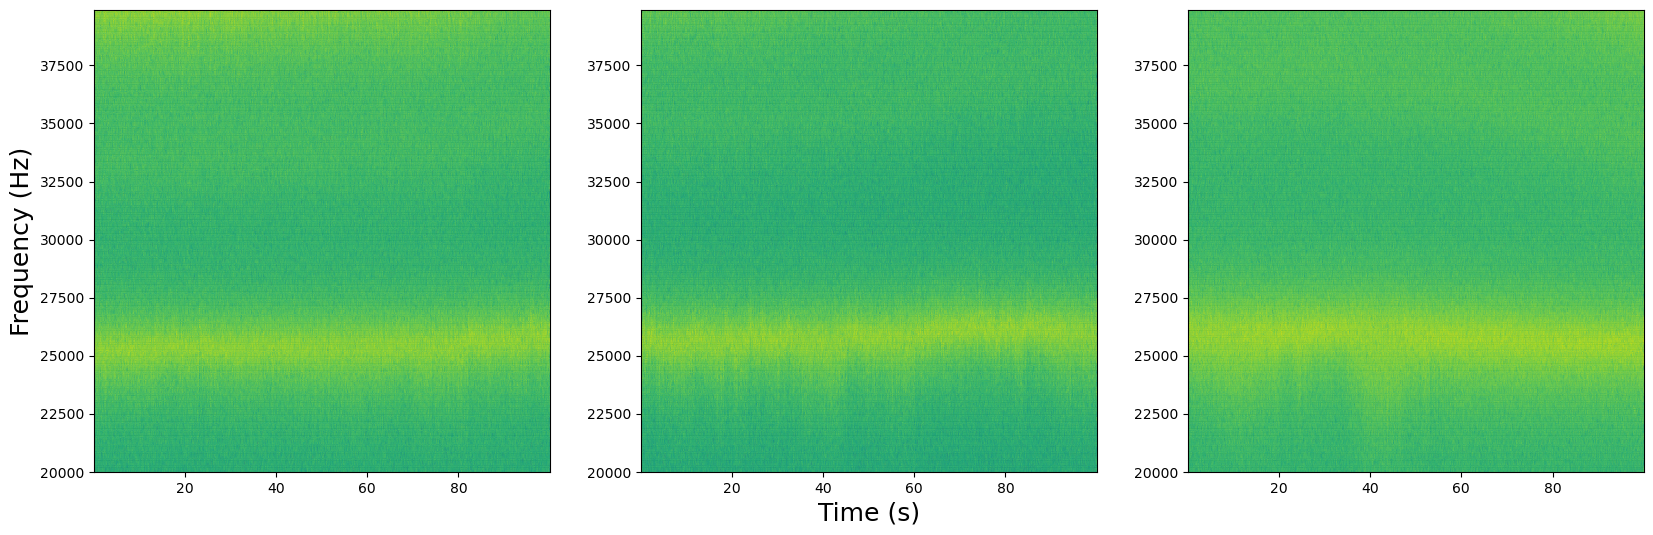

In [42]:
flb, fub = 200, 400
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].pcolormesh(tt, ff[flb:fub], np.log(sxx_loop_off_1[flb:fub]), shading='gouraud')
ax[1].pcolormesh(tt, ff[flb:fub], np.log(sxx_loop_off_2[flb:fub]), shading='gouraud')
ax[2].pcolormesh(tt, ff[flb:fub], np.log(sxx_loop_off_3[flb:fub]), shading='gouraud')

ax[0].set_ylabel('Frequency (Hz)', fontsize=18)
ax[1].set_xlabel('Time (s)', fontsize=18)